# 0.0. Imports

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib            import pyplot as plt

## 0.1. Loading Data

In [4]:
df_raw = pd.read_csv( '/Users/thiago/Thiago/Data_Science/comunidade_ds/health_insurance/data/raw/train.csv' )

In [5]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 0.2. Helper Functions

In [31]:
sns.set(rc={'figure.figsize':(17,10)}) # Aumenta o tamanho dos plots no seaborn

# 1.0. DATA DESCRIPTION

In [6]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [7]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
 cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']

df1.columns = cols_new

In [9]:
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.2. Data Dimensions

In [10]:
print( 'Number of rows:{}'.format( df1.shape[0]))
print( 'Number of columns:{}'.format( df1.shape[1]))

Number of rows:381109
Number of columns:12


## 1.3. Data Types

In [11]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.4. Check NA

In [12]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5. Descriptive Statistical

In [13]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( include=['int64', 'float64', 'datetime64[ns]'] )

In [14]:
# Central Tendency - Mean, Meadian
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0. FEATURE ENGINEERING

In [18]:
df2 = df1.copy()

In [19]:
# vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' 
                                                                        if x == '1-2 Year' else 'below_1_year' )
# vehicle damage                                                                     
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

In [20]:
df2.head(10)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,over_2_years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,between_1_2_year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,over_2_years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,below_1_year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,below_1_year,0,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,below_1_year,1,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,below_1_year,1,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,between_1_2_year,1,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,below_1_year,0,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,below_1_year,0,28771.0,152.0,80,0


# 3.0. FILTERING

In [21]:
df3 = df2.copy()

Como não detectamos variáveis muito fora dos possíveis padrões, não será inicialmente realizar uma filtragem
de variáveis.

# 4.0. EDA

In [22]:
df4 = df3.copy()

## 4.1. Univariate Analisys

In [23]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

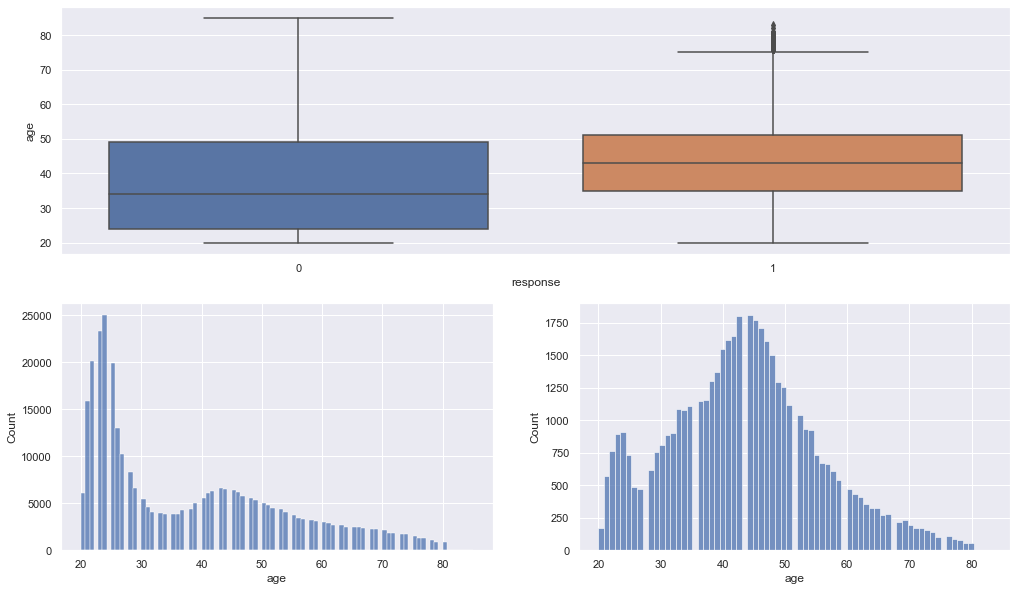

In [71]:
#age
plt.subplot( 2, 1, 1)
sns.boxplot( x='response', y='age', data=df4)

plt.subplot( 2, 2, 3)
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot( aux00 )

plt.subplot( 2, 2, 4)
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot( aux00 );

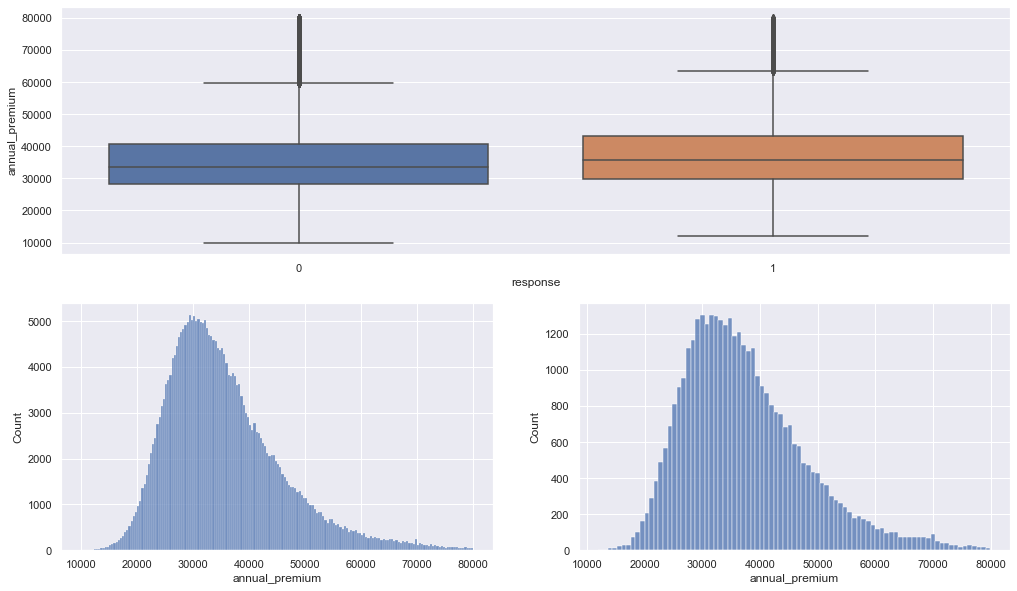

In [74]:
#annual_premium
aux0 = df4[ ( df4['annual_premium'] > 10000 ) & ( df4['annual_premium'] < 80000 ) ]
plt.subplot( 2, 1, 1)
sns.boxplot( x='response', y='annual_premium', data=aux0)

plt.subplot( 2, 2, 3)
aux1 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot( aux1 )

plt.subplot( 2, 2, 4)
aux2= aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot( aux2 );

In [83]:
#driving_license
aux = df4[['driving_license', 'response']].groupby( 'response' ).sum().reset_index()
aux.head()
aux['driving_license'] = aux['driving_license'] / aux['driving_license'].sum()
#sns.barplot( x='response', y='driving_license', data=aux);

In [84]:
aux

,response,driving_license
0,0,0.877283
1,1,0.122717


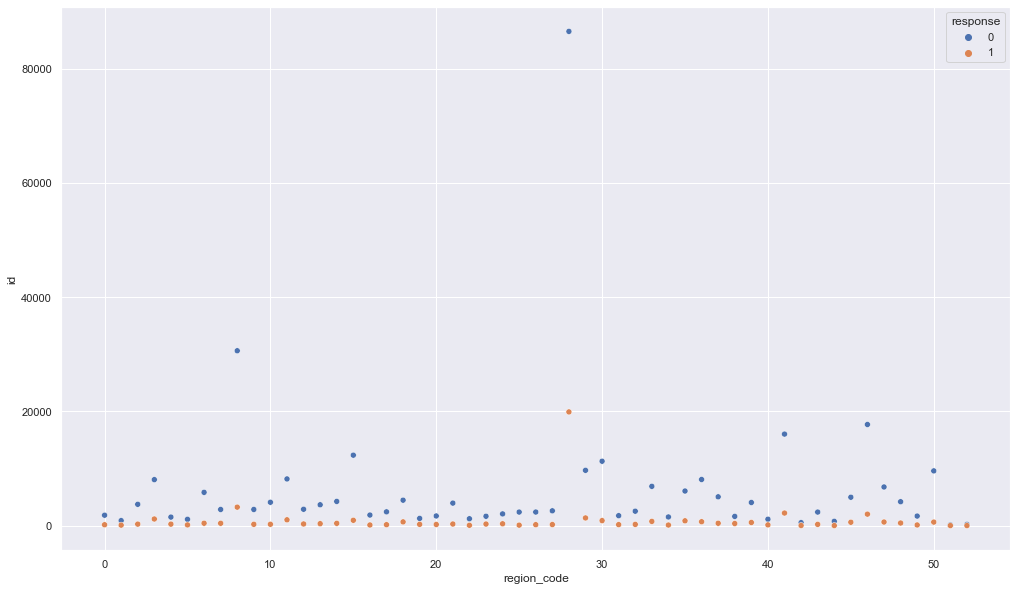

In [93]:
#region_code
aux = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index()
sns.scatterplot( x='region_code', y='id', hue='response', data=aux);

In [52]:
#gender

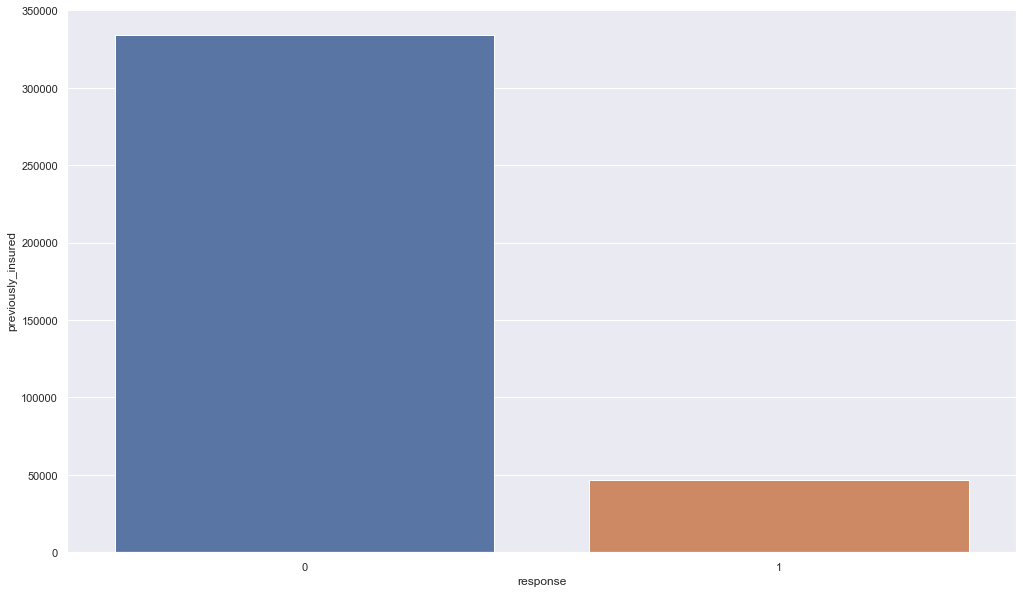

In [98]:
#previously_insured
aux = df4[['previously_insured', 'response']].groupby( 'response' ).count().reset_index()
aux
sns.barplot( x='response', y='previously_insured', data=aux);

In [104]:
pd.crosstab( df4['previously_insured'], df4['response'] )

response,0,1
previously_insured,,
0,159929,46552
1,174470,158


In [103]:
pd.crosstab( df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [111]:
#vehicle_age
df4[['vehicle_age' ,'response']].value_counts( normalize=True ).reset_index()

,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


In [57]:
#vehicle_damage

In [59]:
#policy_sales_channel

In [60]:
#vintage

In [61]:
#response

### 4.1.1. Response Variable

### 4.1.2. Numerical Variable

### 4.1.3. Categorical Variable

## 4.2. Análise Bivariada

### 4.2.1. **Resumo das Hipóteses**

## 4.3. Análise Multivariada

### 4.3.1. Numerical Attributes

### 4.3.2. Categorical Attributes

# 5.0. DATA PREPARATION

## 5.1. Normalização

Observando os dados numéricos na sessão 4.1.2. pode ser observado que não existem variáveis com comportamento normal, assim não valendo a pena executar uma normalização em variáveis que não possuem esse comportamento.

## 5.2. Rescaling

## 5.3. Transformação

### 5.3.1. Encoding

### 5.3.2. Response Variable Transformation

### 5.3.3. Nature Transformation

# 6.0. FEATURE SELECTION

## 6.1. Split dataframe into training and test dataset

## 6.2. Boruta as Feature Selector

### 6.2.1. Best Features from Boruta

## 6.3. Manual Feature Selection

# 7.0. MACHINE LEARNING MODELLING

## 7.1. Average Model

## 7.2. Linear Regression Model

### 7.2.1. Linear Regression Model - Cross Validation

## 7.3. Linear Regression Regularized Model ( Lasso )

### 7.3.1. Linear Regression Regularized Model ( Lasso ) - Cross Validation

## 7.4. Random Forest Regressor

### 7.4.1. Random Forest Regressor - Cross Validation

## 7.5. XGBoost Regressor

### 7.5.1. XGBoost Regressor - Cross Validation

## 7.6. Compare Model's Performance

### 7.6.1. Single Performance

### 7.6.1. Real Performance - Cross Validation

# 8.0. HYPERPARAMETER FINE TUNING

## 8.1. Random Search

## 8.2. Final Model

# 9.0. TRADUÇÃO E INTERPRETAÇÃO DO ERRO

## 9.1. Business Performance

## 9.2. Total Performance

## 9.3. Machine Learning Performance

# 10.0. DEPLOY MODEL TO PRODUCTION

## 10.1. Rossmann Class

## 10.2. API Handler

## 10.3. API Tester